<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Kavindu-Deshanjana/ARIMA_for_branches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.stattools import adfuller



In [6]:
# Mount Google Drive
drive.mount('/content/drive')

# Load preprocessed data from Excel file
file_path = '/content/drive/MyDrive/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx'
data = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


    LeaveYear  LeaveMonth MainDepartment  totalAbsence
0        2021          12    Sewing Team          2870
1        2022           1    Sewing Team          1963
2        2022           2    Sewing Team          2064
3        2022           3    Sewing Team          2048
4        2022           4    Sewing Team          1543
5        2022           5    Sewing Team          2987
6        2022           6    Sewing Team          2544
7        2022           7    Sewing Team          1319
8        2022           8    Sewing Team          1489
9        2022           9    Sewing Team          1365
10       2022          10    Sewing Team          1659
11       2022          11    Sewing Team          1426
12       2022          12    Sewing Team           987
13       2023           1    Sewing Team           919
14       2023           2    Sewing Team           312
15       2023           3    Sewing Team          1032
16       2023           4    Sewing Team           433
17       2

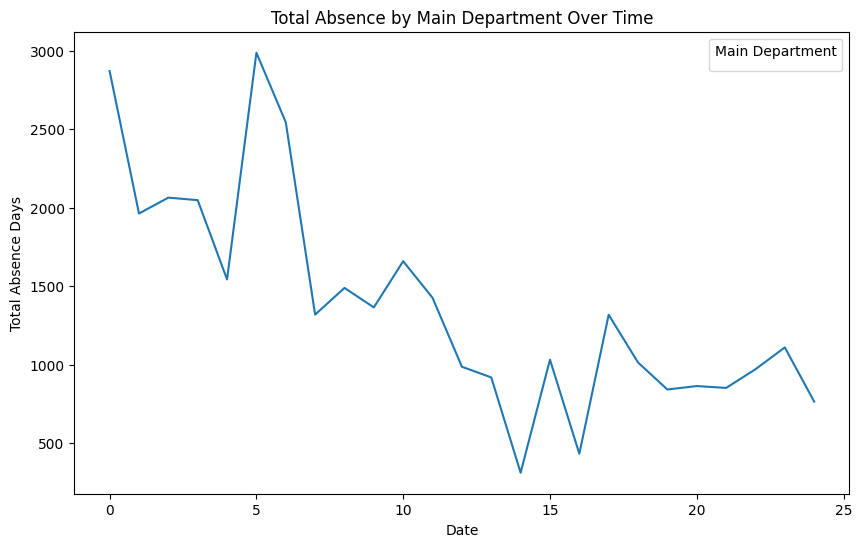

                               SARIMAX Results                                
Dep. Variable:           totalAbsence   No. Observations:                   20
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -145.015
Date:                Sun, 25 Feb 2024   AIC                            300.030
Time:                        14:39:25   BIC                            304.752
Sample:                             0   HQIC                           300.829
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5979      0.304     -1.966      0.049      -1.194      -0.002
ar.L2         -0.3951      0.297     -1.331      0.183      -0.977       0.187
ar.L3         -0.2740      0.361     -0.759      0.4

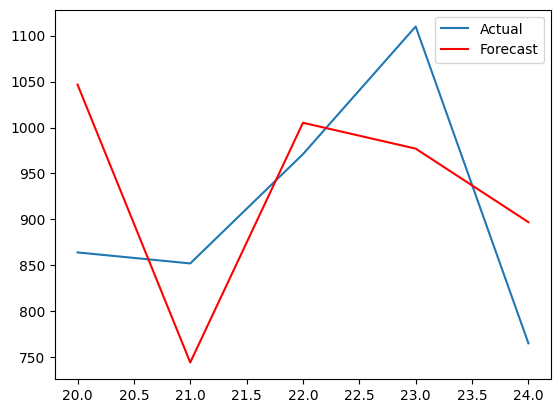

In [18]:
# Define a mapping of sub-departments to main departments
sub_dept_to_main_dept = {
    'Sewing Team': [sub_dept for sub_dept in data['Department'] if sub_dept.startswith('Sewing Team')],
    # 'Jumper Team': [sub_dept for sub_dept in data['Department'] if sub_dept.startswith('Jumper Team')]
}

# Map each sub-department to its main department
main_dept_for_sub_dept = {}
for main_dept, sub_depts in sub_dept_to_main_dept.items():
    for sub_dept in sub_depts:
        main_dept_for_sub_dept[sub_dept] = main_dept

# Add a new column indicating the main department for each row
data['MainDepartment'] = data['Department'].map(main_dept_for_sub_dept)

# Summarize total absence by main department
total_absence_by_main_dept = data.groupby(['LeaveYear','LeaveMonth','MainDepartment']).size().reset_index(name='totalAbsence')
print(total_absence_by_main_dept)

# # Pivot table to have main department as columns and date as index
# pivot_table = total_absence_by_main_dept.pivot(index='Date', columns='MainDepartment', values='NumOfLeaveDays')

# # Fill missing values with 0
# pivot_table.fillna(0, inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(total_absence_by_main_dept['totalAbsence'])
plt.title('Total Absence by Main Department Over Time')
plt.xlabel('Date')
plt.ylabel('Total Absence Days')
plt.legend(title='Main Department')
plt.show()

# Check for stationarity
def adf_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


# Train-test split
train_size = int(len(total_absence_by_main_dept['totalAbsence']) * 0.8)
train, test = total_absence_by_main_dept['totalAbsence'].iloc[:train_size], total_absence_by_main_dept['totalAbsence'].iloc[train_size:]

# # Fit ARIMA model for each main department
model = ARIMA(train, order=(4,1,0))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))
print(forecast)

mse = mean_squared_error(test, forecast)
print("MSE : ", mse)

rsme = np.sqrt(mse)
print("RSME : ", rsme)

plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.show()


